In [32]:
# 导入常用包
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


# 设置中文字体所用的包
from pylab import mpl 
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 一、图1——全国总体人均寿命随年代的变化

In [2]:
# 读取数据
df = pd.read_csv('lifeExp.csv')

In [3]:
# df_avg_life_exp_of_nation 仅抽取全国平均数据后组成的表

df_avg_life_exp_of_nation_temp = df.loc[df['province']=='All',['year','AvglifeExp'] ]
df_avg_life_exp_of_nation = df_avg_life_exp_of_nation_temp.drop_duplicates()

In [5]:
# 将column转成列表方便作为画图时的参数
list_avg_life_exp_of_nation = df_avg_life_exp_of_nation['AvglifeExp'].tolist()  # 平均寿命，将来的纵坐标
list_years = df_avg_life_exp_of_nation['year'].tolist() # 年份、将来的横坐标

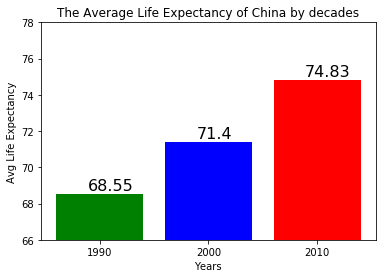

In [46]:


ind = np.arange(len(list_years))
height = list_avg_life_exp_of_nation
width = 0.1

plt.bar(ind,height, color=['green', 'blue', 'red'])
plt.title('The Average Life Expectancy of China by decades')
plt.xlabel('Years')
plt.ylabel('Avg Life Expectancy')
# plt.title('中国总体平均寿命历年变化情况')
# plt.xlabel('年份')
# plt.ylabel('平均寿命')
plt.xticks(ind,list_years)
floor_of_avglife = min(list_avg_life_exp_of_nation) # 取平均寿命的最小值作为下界
ceiling_of_avglife = max(list_avg_life_exp_of_nation) #  取平均寿命的最大值作为上界
# 以寿命的上下界为基准建立纵坐标刻度，以增加区分度
plt.ylim([math.ceil(floor_of_avglife - 0.5 * (ceiling_of_avglife - floor_of_avglife)), math.ceil(ceiling_of_avglife + 0.5 * (ceiling_of_avglife - floor_of_avglife))])


for i in range(len(height)):
    plt.text(x = ind[i]- 0.11  , y = height[i]+0.2, s = height[i], size =16) 


# 二、图2——比较平均寿命在性别上的差异

In [29]:
df_life_exp_of_nation_temp = df.loc[df['province']=='All',['year','gender','lifeExp'] ]
df_life_exp_of_nation = df_life_exp_of_nation_temp.drop_duplicates()

In [31]:
n_groups = len(list_years)
men = df_life_exp_of_nation.loc[ df_life_exp_of_nation_temp['gender'] == 'male','lifeExp'].tolist()
women = df_life_exp_of_nation.loc[ df_life_exp_of_nation_temp['gender'] == 'female','lifeExp'].tolist()
different = list(map(lambda x: x[0]-x[1], zip(women, men)))


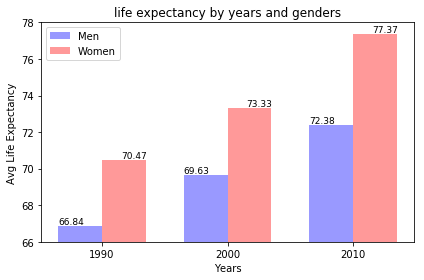

In [45]:


fig,ax = plt.subplots()


index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4

rects1 = ax.bar(index, men, bar_width,
                alpha=opacity, color='b',
                label='Men')
rects2 = ax.bar(index + bar_width, women, bar_width,
                alpha=opacity, color='r',
                label='Women')

ax.set_xlabel('Years')
ax.set_ylabel('Avg Life Expectancy')
ax.set_title('life expectancy by years and genders')

# rects1 = ax.bar(index, men, bar_width,
#                 alpha=opacity, color='b',
#                 label='男性')
# rects2 = ax.bar(index + bar_width, women, bar_width,
#                 alpha=opacity, color='r',
#                 label='女性')

# ax.set_xlabel('年份')
# ax.set_ylabel('全功总体平均寿命')
# ax.set_title('历年平均寿命在性别上的分布')


ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(list_years)
ax.legend()
plt.ylim([math.ceil(floor_of_avglife - 0.5 * (ceiling_of_avglife - floor_of_avglife)), math.ceil(ceiling_of_avglife + 0.5 * (ceiling_of_avglife - floor_of_avglife))])
fig.tight_layout()

height = df_life_exp_of_nation_temp['lifeExp'].tolist()
ind = np.arange(len(height))
for i in range(len(height)):
    plt.text(x = ind[i]/2 - bar_width / 2 , y = height[i]+0.1, s = height[i], size =9)


plt.show()

<Figure size 1440x720 with 0 Axes>

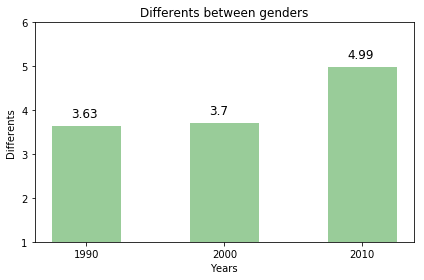

In [43]:
plt.figure(figsize=(20,10))

ind = np.arange(len(list_years))

width = 0.5

fig,ax = plt.subplots()

opacity = 0.4

rects1 = ax.bar(ind, different, width,
                alpha=opacity, color='g')

ax.set_xlabel('Years')
ax.set_ylabel('Differents ')
ax.set_title('Differents between genders')
# ax.set_xlabel('年份')
# ax.set_ylabel('男女在寿命上差异')
# ax.set_title('男女在寿命上的差异按年份的变化')

ax.set_xticks(ind)
ax.set_xticklabels(list_years)


plt.ylim([1, 6])
fig.tight_layout()


for i in range(len(different)):
    plt.text(x = ind[i]- 0.11  , y = different[i]+ 0.2 , s = round(different[i],2), size =12 ) 

plt.show()

# 三、图3——观察平均寿命在地理上的分布情况

In [14]:
# 为了正常的引入basemap包需要指定proj_lib在文件系统中的位置，这个是jupyter notebook 特有的bug

import os
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'library'), 'share')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [40]:
# 将1990年各省的平均年龄汇总到一张表上，缺失的四川数据用周边省的平均值来替代
df_avg_province_1990_temp =  df.loc[df['year'] == 1990, ['year','province','AvglifeExp']]
df_avg_province_1990 = df_avg_province_1990_temp.drop_duplicates()
df_avg_province_1990.set_index('province',inplace = True)
missingvalue = df_avg_province_1990.loc[['Qinghai','Gansu','Shaanxi','Chongqing','Guizhou','Yunnan','Xizang'],'AvglifeExp'].mean()
df_avg_province_1990.loc['Sichuan','AvglifeExp'] =  missingvalue

In [17]:
# 将2000年各省的平均年龄汇总到一张表上
df_avg_province_2000_temp =  df.loc[df['year'] == 2000, ['year','province','AvglifeExp']]
df_avg_province_2000 = df_avg_province_2000_temp.drop_duplicates()
df_avg_province_2000.set_index('province',inplace = True)

In [18]:
# 将2010年各省的平均年龄汇总到一张表上
df_avg_province_2010_temp =  df.loc[df['year'] == 2010, ['year','province','AvglifeExp']]
df_avg_province_2010 = df_avg_province_2010_temp.drop_duplicates()
df_avg_province_2010.set_index('province',inplace = True)

In [19]:
# 年龄的下界用 1990年的最小值，年龄的上界用2010的最大值
vmin = df_avg_province_1990['AvglifeExp'].min()
vmax = df_avg_province_2010['AvglifeExp'].max()

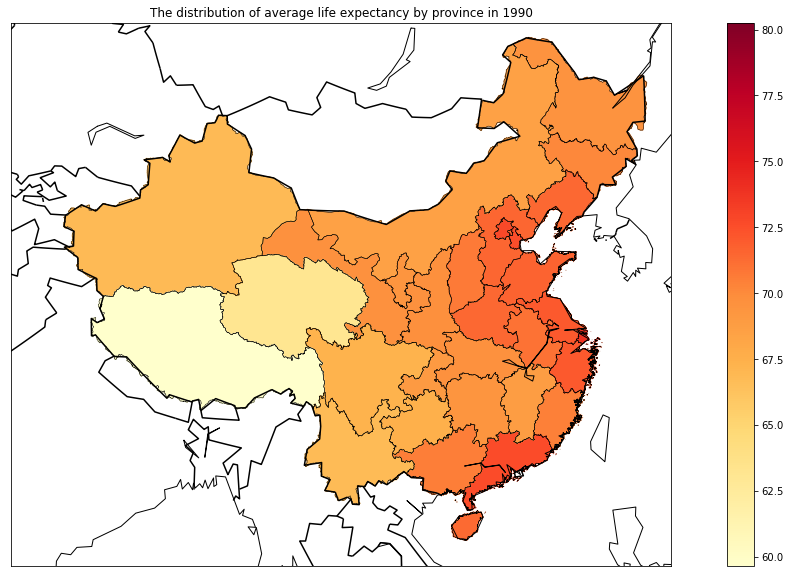

In [24]:
# 绘制1990年 平均寿命在地理上的分布情况

from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
from matplotlib.colors import Normalize
from matplotlib import cm

plt.figure(figsize=(20,10))
m = Basemap(
    llcrnrlon=77,
    llcrnrlat=14,
    urcrnrlon=140,
    urcrnrlat=51,
    projection='lcc',
    lat_1=33,
    lat_2=45,
    lon_0=100
)
m.drawcountries(linewidth=1.5)
m.drawcoastlines()

# 为了绘制地图需要指定地图文件的路径
m.readshapefile('gadm36_CHN_shp\\gadm36_CHN_1', 'states', drawbounds=True)

statenames=[]
colors={}
cmap = plt.cm.YlOrRd

for shapedict in m.states_info:
    statename = shapedict['NAME_1']
    statenames.append(statename)
    avglife = df_avg_province_1990.loc[statename,'AvglifeExp']
    colors[statename] = cmap(np.sqrt((avglife - vmin) / (vmax - vmin)) * 0.8 )[:3]

ax = plt.gca()
for nshape, seg in enumerate(m.states):
    color = rgb2hex(colors[statenames[nshape]])
    poly = Polygon(seg, facecolor=color, edgecolor=color)
    ax.add_patch(poly)
    

sm = cm.ScalarMappable(Normalize(vmin, vmax) ,cmap)
sm._A =[]
plt.colorbar(sm)
plt.title("The distribution of average life expectancy by province in 1990")
# plt.title("1990年各省人均寿命在地理上的分布表示")
plt.show()

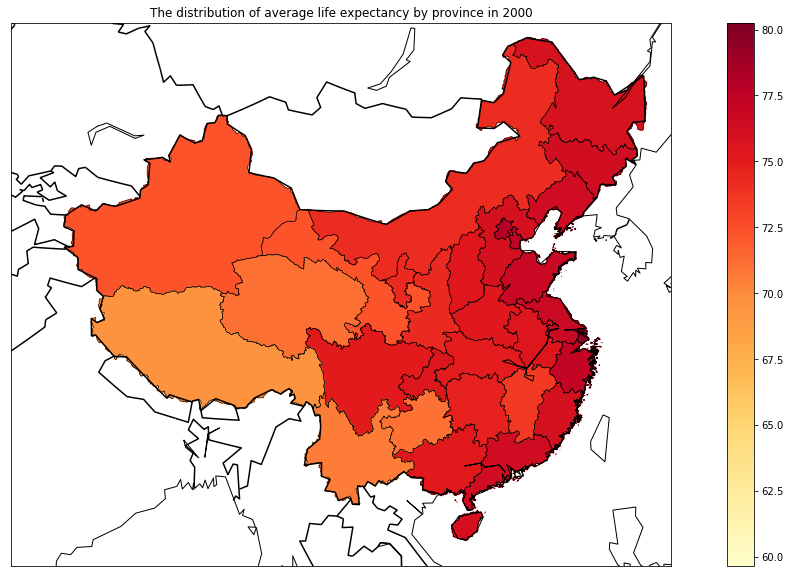

In [25]:
# 绘制2000年 平均寿命在地理上的分布情况


plt.figure(figsize=(20,10))
m = Basemap(
    llcrnrlon=77,
    llcrnrlat=14,
    urcrnrlon=140,
    urcrnrlat=51,
    projection='lcc',
    lat_1=33,
    lat_2=45,
    lon_0=100
)
m.drawcountries(linewidth=1.5)
m.drawcoastlines()

m.readshapefile('gadm36_CHN_shp\\gadm36_CHN_1', 'states', drawbounds=True)

statenames=[]
colors={}
cmap = plt.cm.YlOrRd

for shapedict in m.states_info:
    statename = shapedict['NAME_1']
    statenames.append(statename)
    avglife = df_avg_province_2000.loc[statename,'AvglifeExp']
    colors[statename] = cmap(np.sqrt((avglife - vmin) / (vmax - vmin)) * 1.0 )[:3]

ax = plt.gca()
for nshape, seg in enumerate(m.states):
    color = rgb2hex(colors[statenames[nshape]])
    poly = Polygon(seg, facecolor=color, edgecolor=color)
    ax.add_patch(poly)
    

sm = cm.ScalarMappable(Normalize(vmin, vmax) ,cmap)
sm._A =[]
plt.colorbar(sm)

plt.title("The distribution of average life expectancy by province in 2000")
#plt.title("2000年各省人均寿命在地理上的分布表示")
plt.show()

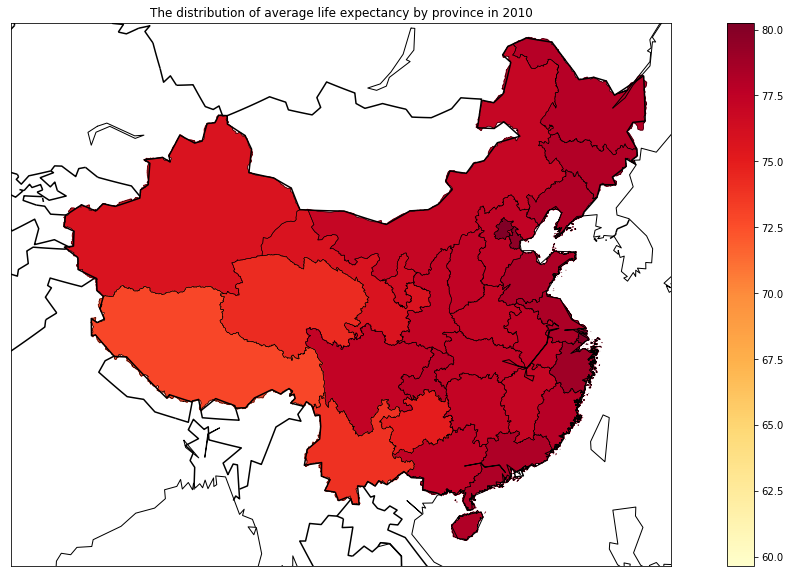

In [26]:
# 绘制2010年 平均寿命在地理上的分布情况


plt.figure(figsize=(20,10))
m = Basemap(
    llcrnrlon=77,
    llcrnrlat=14,
    urcrnrlon=140,
    urcrnrlat=51,
    projection='lcc',
    lat_1=33,
    lat_2=45,
    lon_0=100
)
m.drawcountries(linewidth=1.5)
m.drawcoastlines()

m.readshapefile('gadm36_CHN_shp\\gadm36_CHN_1', 'states', drawbounds=True)

statenames=[]
colors={}
cmap = plt.cm.YlOrRd

for shapedict in m.states_info:
    statename = shapedict['NAME_1']
    statenames.append(statename)
    avglife = df_avg_province_2010.loc[statename,'AvglifeExp']
    colors[statename] = cmap(np.sqrt((avglife - vmin) / (vmax - vmin)) * 1.0)[:3]

ax = plt.gca()
for nshape, seg in enumerate(m.states):
    color = rgb2hex(colors[statenames[nshape]])
    poly = Polygon(seg, facecolor=color, edgecolor=color)
    ax.add_patch(poly)
    


    
sm = cm.ScalarMappable(Normalize(vmin, vmax) ,cmap)
sm._A =[]
plt.colorbar(sm)

plt.title("The distribution of average life expectancy by province in 2010")
#plt.title("2010年各省人均寿命在地理上的分布表示")
plt.show()

